In [2]:
from control.matlab import tf

"""
後で使う関数の定義
"""

def linestyle_generator():
    """グラフをプロットするときの線種を決めるジェネレータ"""
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

def plot_set(fig_ax, *args):
    """グラフを整える"""
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args) == 3:
        fig_ax.legend(loc=args[2])

def bodeplot_set(fig_ax, *args):
    """ボード線図を整える"""
    # ゲイン線図
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')

    # 位相線図
    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('omega [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')

    # 凡例
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

"""
垂直駆動アームのモデル
"""

g = 9.81
l = 0.2
M = 0.5
mu = 1.5e-2
J = 1.0e-2

P = tf([0, 1], [J, mu, M*g*l])

ref = 30 # 目標角度

c:\Users\asei\control.py\.venv\Lib\site-packages\control\timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


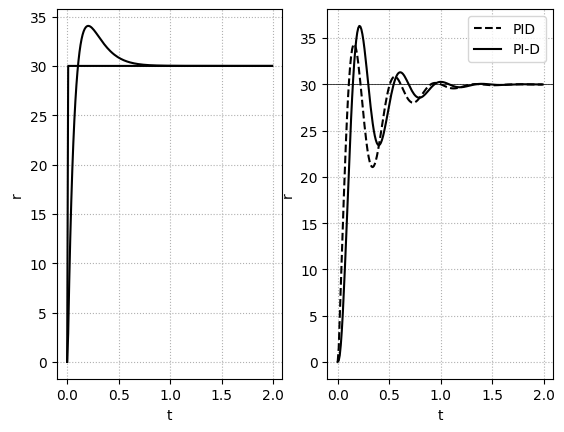

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import feedback, lsim

kp, ki, kd = 2, 10, 0.1
K1 = tf([kd, kp, ki], [1, 0]) # PID制御器
K2 = tf([kp, ki], [kd, kp, ki]) # PI-D制御器

# z から y への伝達関数
Gyz = feedback(P * K1, 1)

Td = np.arange(0, 2, 0.01)
r = 1 * (Td > 0)

# 目標値rをK2で整形する
z, t, _ = lsim(K2, r, Td)

fig, ax = plt.subplots(1, 2)

# PID制御(z=rとする)
y, _, _ = lsim(Gyz, r, Td, 0)
ax[0].plot(t, r * ref, color='k')
ax[1].plot(t, y * ref, color = 'k', ls="--", label='PID')

# PI-D制御
y, _, _ = lsim(Gyz, z, Td, 0)
ax[0].plot(t, z * ref, color='k')
ax[1].plot(t, y * ref, color = 'k', label='PI-D')

ax[1].axhline(ref, color='k', linewidth=0.5)
plot_set(ax[0], 't', 'r')
plot_set(ax[1], 't', 'r', 'best')

c:\Users\asei\control.py\.venv\Lib\site-packages\control\timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


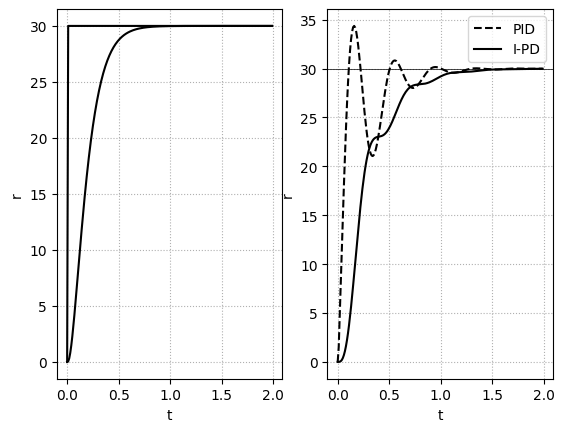

In [23]:
kp, ki, kd = 2, 10, 0.1
K1 = tf([kd, kp, ki], [1, 0]) # PID制御器
K3 = tf([ki], [kd, kp, ki]) # I-PD制御器

# z から y への伝達関数
Gyz = feedback(P * K1, 1)

Td = np.arange(0, 2, 0.01)
r = 1 * (Td > 0)

# 目標値rをK2で整形する
z, t, _ = lsim(K3, r, Td, 0)

fig, ax = plt.subplots(1, 2)

# PID制御(z=rとする)
y, _, _ = lsim(Gyz, r, Td, 0)
ax[0].plot(t, r * ref, color='k')
ax[1].plot(t, y * ref, color = 'k', ls="--", label='PID')

# I-PD制御
y, _, _ = lsim(Gyz, z, Td, 0)
ax[0].plot(t, z * ref, color='k')
ax[1].plot(t, y * ref, color = 'k', label='I-PD')

ax[1].axhline(ref, color='k', linewidth=0.5)
plot_set(ax[0], 't', 'r')
plot_set(ax[1], 't', 'r', 'best')